In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
pd.set_option('display.max_columns', None)# 显示所有列
pd.set_option('display.max_rows', 200) # 最多显示200行

### 读取数据

In [54]:
data = pd.read_csv("modelData/vegtation0.csv")
data

,X,Y,Height
0,0,0,3.53613
1,10,0,2.40798
2,20,0,2.41513
3,30,0,2.42287
4,40,0,2.43089
...,...,...,...
956,260,3000,2.34882
957,270,3000,2.11383
958,280,3000,1.90717
959,290,3000,1.72221


In [55]:
l0=data['Height'][:31]   
l0[30] = l0[29]

l1=data['Height'][31:62]   
# l1[30] = l0[29]
l2=data['Height'][31*2:31*3]
l3=data['Height'][31*3:31*4]
l4=data['Height'][31*4:31*5]
l5=data['Height'][31*5:31*6]
l6=data['Height'][31*6:31*7]
l7=data['Height'][31*7:31*8]
l8=data['Height'][31*8:31*9]
l9=data['Height'][31*9:31*10]
l10=data['Height'][31*10:31*11]
l11=data['Height'][31*11:31*12]
l12=data['Height'][31*12:31*13]
l13=data['Height'][31*13:31*14]
l14=data['Height'][31*14:31*15]
l15=data['Height'][31*15:31*16]
l16=data['Height'][31*16:31*17]
l17=data['Height'][31*17:31*18]
l18=data['Height'][31*18:31*19]
l19=data['Height'][31*19:31*20]
l20=data['Height'][31*20:31*21]
l21=data['Height'][31*21:31*22]
l22=data['Height'][31*22:31*23]
l23=data['Height'][31*23:31*24]
l24=data['Height'][31*24:31*25]
l25=data['Height'][31*25:31*26]
l26=data['Height'][31*26:31*27]
l27=data['Height'][31*27:31*28]
l28=data['Height'][31*28:31*29]
l29=data['Height'][31*29:31*30]
l30=data['Height'][31*30:31*31]



In [56]:
nx = 30 +1
ny = 30 +1
xlength = 300
ylength = 3000 

In [57]:
x = np.linspace(0,xlength, nx)
y = np.linspace(0,ylength, ny)

In [58]:
x,x.shape,y,y.shape

(array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290., 300.]),
 (31,),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700.,
        1800., 1900., 2000., 2100., 2200., 2300., 2400., 2500., 2600.,
        2700., 2800., 2900., 3000.]),
 (31,))

In [59]:
X, Y = np.meshgrid(x, y)
X.shape, Y.shape

((31, 31), (31, 31))

In [60]:
Z=(np.zeros(nx*ny).reshape(nx,ny)).T

In [65]:
    
Z[0,:]  = l1
Z[1,:]  = l1
Z[2,:]  = l2
Z[3,:]  = l3
Z[4,:]  = l4
Z[5,:]  = l5
Z[6,:]  = l6
Z[7,:]  = l7
Z[8,:]  = l8
Z[9,:]  = l9
Z[10,:] = l10
Z[11,:] = l11
Z[12,:] = l12
Z[13,:] = l13
Z[14,:] = l14
Z[15,:] = l15
Z[16,:] = l16
Z[17,:] = l17
Z[18,:] = l18
Z[19,:] = l19
Z[20,:] = l20
Z[21,:] = l21
Z[22,:] = l22
Z[23,:] = l23
Z[24,:] = l24
Z[25,:] = l25
Z[26,:] = l26
Z[27,:] = l27
Z[28,:] = l28
Z[29,:] = l29
Z[30,:] = l29

Text(5, 2700, '$→Height$')

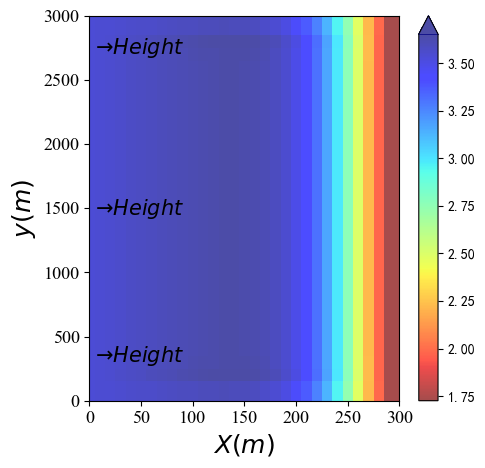

In [99]:
plt.figure(num=1,figsize = (5,5), facecolor=None)
plt.pcolormesh(X, Y, Z, cmap='jet_r',alpha=0.7)
plt.colorbar(extend='max')
plt.xlim(0,300)
plt.ylim(0,3000)
plt.xticks([0,50,100,150,200,250,300],fontproperties = 'Times New Roman',size = 13)
plt.yticks([0,500,1000,1500,2000,2500,3000],fontproperties = 'Times New Roman',size = 13)
plt.xlabel('$X(m)$',size=18)
plt.ylabel('$y(m)$',size=18)
plt.text(5, 300, '$→Height$',fontsize=15)
plt.text(5, 1450, '$→Height$',fontsize=15)
plt.text(5, 2700, '$→Height$',fontsize=15)

In [77]:
data2d.shape

(1024, 1024)

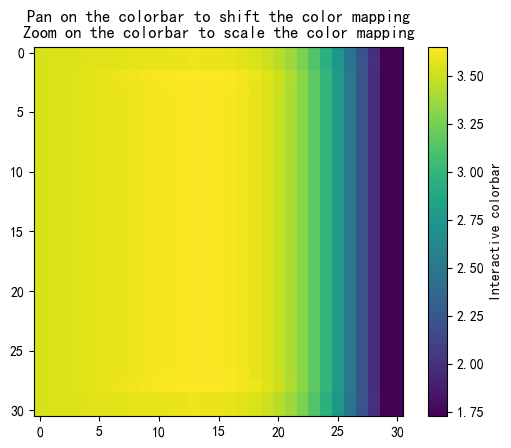

In [78]:

t = np.linspace(0, 2 * np.pi, 1024)
data2d = np.sin(t)[:, np.newaxis] * np.cos(t)[np.newaxis, :]

fig, ax = plt.subplots()
im = ax.imshow(Z)
ax.set_title('Pan on the colorbar to shift the color mapping\n'
             'Zoom on the colorbar to scale the color mapping')

fig.colorbar(im, ax=ax, label='Interactive colorbar')

plt.show()

# 第三章

## 参数对波浪的衰减影响

### 植被高度

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [6]:
data = pd.read_csv("modelData/参数对波浪衰减影响.csv")
data

,x0,ah01,x1,ah02,x2,ah04,x3,ah06,x4,ah08,x5,ah10,x6,ah12
0,0,0.200,0,0.200000,0,0.200000,0,0.20000,0,0.200000,0,0.200000,0,0.200000
1,20,0.200,20,0.200000,20,0.200000,20,0.20000,20,0.200000,20,0.200000,20,0.200000
2,40,0.200,40,0.200000,40,0.200000,40,0.20000,40,0.200000,40,0.200000,40,0.200000
3,60,0.200,60,0.200000,60,0.200000,60,0.20000,60,0.200000,60,0.200000,60,0.200000
4,80,0.200,80,0.200000,80,0.200000,80,0.20000,80,0.200000,80,0.200000,80,0.200000
5,100,0.200,100,0.200000,100,0.200000,100,0.20000,100,0.200000,100,0.200000,100,0.200000
6,120,0.199,120,0.197792,120,0.196666,120,0.19534,120,0.194034,120,0.194034,120,0.194034
7,140,0.198,140,0.195584,140,0.193332,140,0.19068,140,0.188068,140,0.188068,140,0.188068
8,160,0.197,160,0.193376,160,0.189998,160,0.18602,160,0.182102,160,0.182102,160,0.182102
9,180,0.196,180,0.191168,180,0.186664,180,0.18136,180,0.176136,180,0.176136,180,0.176136


In [7]:
x0 = data['x0']
ah01 = data['ah01']
ah02 = data['ah02']
ah04 = data['ah04']
ah06 = data['ah06']
ah08 = data['ah08']
ah10 = data['ah10']
ah12 = data['ah12']


In [61]:
x1 = np.array([0,1.0, 1.2])
y1 = np.array([0.20,0.17, 0.17])
x_veg=np.array([100, 100])
y_veg=np.array([0.160, 0.203])
x_lim=np.array([1.0, 1.0])
y_lim=np.array([0.170, 0.200])

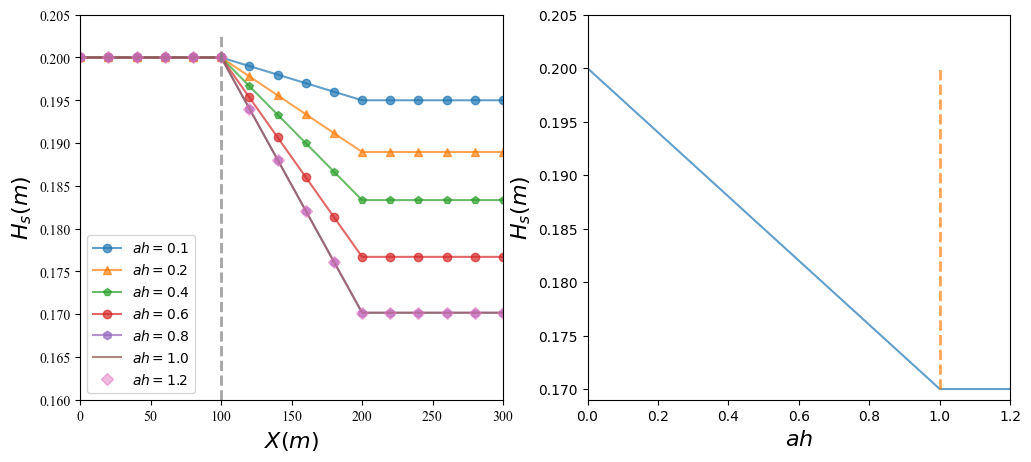

In [64]:
plt.figure(num=2,figsize = (12,5), facecolor=None)
plt.subplot(121)
plt.plot(x0,ah01,'-o',label='$ah=0.1$',alpha=0.7)
plt.plot(x0,ah02,'-^',label='$ah=0.2$',alpha=0.7)
plt.plot(x0,ah04,'-p',label='$ah=0.4$',alpha=0.7)
plt.plot(x0,ah06,'-o',label='$ah=0.6$',alpha=0.7)
plt.plot(x0,ah08,'-h',label='$ah=0.8$',alpha=0.7)
plt.plot(x0,ah10,'-',label='$ah=1.0$',alpha=0.7)
plt.plot(x0,ah12,'D',label='$ah=1.2$',alpha=0.5)
plt.plot(x_veg,y_veg,'--',alpha=0.7,linewidth=2)
plt.legend(loc='lower left',prop={'family' : 'Times New Roman', 'size'   : 10})

plt.xticks(fontsize=16,fontproperties='Times New Roman') 
plt.yticks(fontsize=16,fontproperties='Times New Roman')
plt.xlim(0,300)
plt.ylim(0.16,0.205)

plt.xlabel('$X(m)$', fontsize=16) 
plt.ylabel('$H_s(m)$', fontsize=16)

plt.subplot(122)
plt.plot(x1,y1,'-',label='$ah=0.1$',alpha=0.7)
plt.plot(x_lim,y_lim,'--',alpha=0.7,linewidth=2)

plt.xlabel('$ah$', fontsize=16) 
plt.ylabel('$H_s(m)$', fontsize=16)
plt.xlim(0,1.2)
plt.ylim(0.169,0.205)
plt.savefig('modelData/植被ah参数对波浪衰减影响.png',dpi=500,bbox_inches='tight')


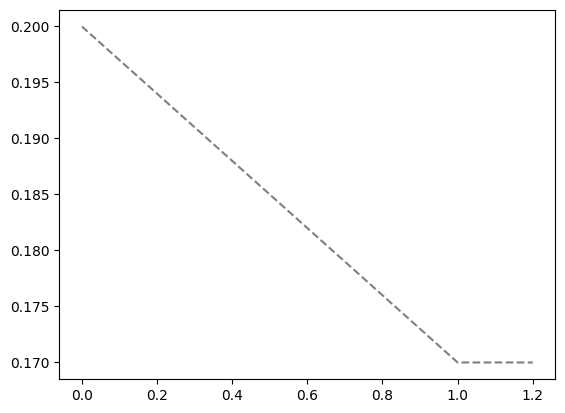

In [38]:
plt.plot(x1,y1,'--',color='black',alpha=0.5)    